In [1]:
# load library
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import postprocess_scripts.plot_conden_convergence as ps

In [2]:
# define basic array and examined variables
dt        = np.array([1,2,5,10,15,30,60,100,200,450,900,1800])
ndt       = (1800/dt).astype(int)
x_array   = dt[1:]
tsize     = dt.size
data_path = "./postprocess_input/"
vname     = "h2so4_gas"
var_type  = "gas"
out_name  = "H2SO4"
outpath   = "./postprocess_output/"

In [3]:
# store the last time slice of variable from each file
for i in np.arange(tsize):
    fname = 'mam_dt'+str(dt[i])+'_ndt'+str(ndt[i])+'.nc'
    ds    = xr.open_dataset(data_path+fname)
    yy    = np.array(ds[vname])
    if  var_type == 'aer':
        if  i == 0:
            mode     = ds['mode'].size - 1     # soa or so4 does not exist in primary carbon mode
            y_array  = np.empty([mode,tsize])
        y_array[0:mode,i] = yy[0:mode,-1]
    elif var_type == 'gas':
        if  i == 0:
            y_array  = np.empty([tsize])
        y_array[i]   = yy[-1]
    else:
        print("Unrecognized var_type: %s" % var_type)
    ds.close()
    del fname

# calculate the relative error using 1s as reference solution
for i in np.arange(tsize):
    if  var_type == 'aer':
        if  i == 0:
            rel_err        = np.empty([tsize-1,mode])
        else:
            rel_err[i-1,:] = np.abs(y_array[:,i] - y_array[:,0]) / y_array[:,0]
    elif var_type == 'gas':
        if  i == 0:
            rel_err        = np.empty([tsize-1])
        else:
            rel_err[i-1]   = np.abs(y_array[i] - y_array[0]) / y_array[0]
    else:
        print("Unrecognized var_type: %s" % var_type)

del y_array

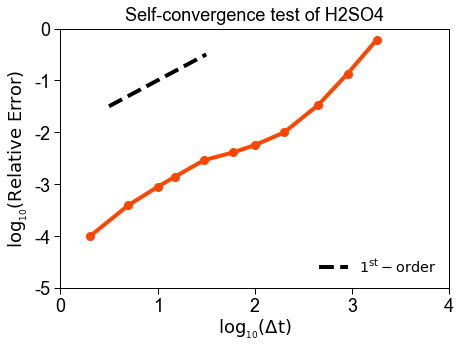

In [4]:
# make the plot of error convergence
x_array = dt[1:]
ps.plot_convergence(outpath,out_name,var_type,x_array,rel_err,porder=[1],
                    ylabel=np.arange(-5,1,1),ylim=[-5,0],nrows=1,ncols=1,
                    loc='lower right',fontheight=18,left=0,right=0.9,top=0.9,bottom=0)

In [5]:
for i in np.arange(x_array.size):
    print('dt = %4i, relative error = %.4e' % (x_array[i], rel_err[i]))

dt =    2, relative error = 9.7245e-05
dt =    5, relative error = 3.8991e-04
dt =   10, relative error = 8.8077e-04
dt =   15, relative error = 1.3754e-03
dt =   30, relative error = 2.8808e-03
dt =   60, relative error = 4.0814e-03
dt =  100, relative error = 5.6209e-03
dt =  200, relative error = 9.8888e-03
dt =  450, relative error = 3.3572e-02
dt =  900, relative error = 1.3452e-01
dt = 1800, relative error = 6.1021e-01


In [6]:
# define basic array and examined variables
vname     = "soag_gas"
var_type  = "gas"
out_name  = "SOAG"

In [7]:
# store the last time slice of variable from each file
for i in np.arange(tsize):
    fname = 'mam_dt'+str(dt[i])+'_ndt'+str(ndt[i])+'.nc'
    ds    = xr.open_dataset(data_path+fname)
    yy    = np.array(ds[vname])
    if  var_type == 'aer':
        if  i == 0:
            mode     = ds['mode'].size - 1     # soa or so4 does not exist in primary carbon mode
            y_array  = np.empty([mode,tsize])
        y_array[0:mode,i] = yy[0:mode,-1]
    elif var_type == 'gas':
        if  i == 0:
            y_array  = np.empty([tsize])
        y_array[i]   = yy[-1]
    else:
        print("Unrecognized var_type: %s" % var_type)
    ds.close()
    del fname

# calculate the relative error using 1s as reference solution
for i in np.arange(tsize):
    if  var_type == 'aer':
        if  i == 0:
            rel_err        = np.empty([tsize-1,mode])
        else:
            rel_err[i-1,:] = np.abs(y_array[:,i] - y_array[:,0]) / y_array[:,0]
    elif var_type == 'gas':
        if  i == 0:
            rel_err        = np.empty([tsize-1])
        else:
            rel_err[i-1]   = np.abs(y_array[i] - y_array[0]) / y_array[0]
    else:
        print("Unrecognized var_type: %s" % var_type)

del y_array

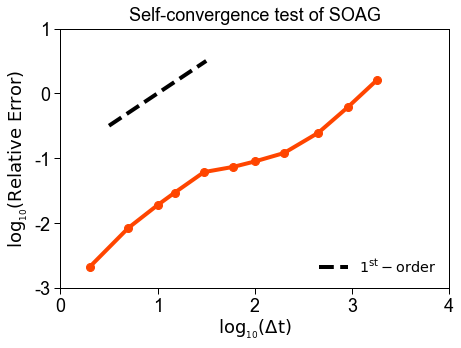

In [8]:
# make the plot of error convergence
ps.plot_convergence(outpath,out_name,var_type,x_array,rel_err,porder=[1],
                    ylabel=np.arange(-3,2,1),ylim=[-3,1],nrows=1,ncols=1,
                    loc='lower right',fontheight=18,left=0,right=0.9,top=0.9,bottom=0)

In [9]:
for i in np.arange(x_array.size):
    print('dt = %4i, relative error = %.4e' % (x_array[i], rel_err[i]))

dt =    2, relative error = 2.0921e-03
dt =    5, relative error = 8.3713e-03
dt =   10, relative error = 1.8846e-02
dt =   15, relative error = 2.9331e-02
dt =   30, relative error = 6.0845e-02
dt =   60, relative error = 7.3197e-02
dt =  100, relative error = 8.8753e-02
dt =  200, relative error = 1.1985e-01
dt =  450, relative error = 2.4615e-01
dt =  900, relative error = 6.0640e-01
dt = 1800, relative error = 1.5956e+00


In [10]:
# define basic array and examined variables
vname     = "so4_aer"
var_type  = "aer"
out_name  = "SO4"

In [11]:
# store the last time slice of variable from each file
for i in np.arange(tsize):
    fname = 'mam_dt'+str(dt[i])+'_ndt'+str(ndt[i])+'.nc'
    ds    = xr.open_dataset(data_path+fname)
    yy    = np.array(ds[vname])
    if  var_type == 'aer':
        if  i == 0:
            mode     = ds['mode'].size - 1     # soa or so4 does not exist in primary carbon mode
            y_array  = np.empty([mode,tsize])
        y_array[0:mode,i] = yy[0:mode,-1]
    elif var_type == 'gas':
        if  i == 0:
            y_array  = np.empty([tsize])
        y_array[i]   = yy[-1]
    else:
        print("Unrecognized var_type: %s" % var_type)
    ds.close()
    del fname

# calculate the relative error using 1s as reference solution
for i in np.arange(tsize):
    if  var_type == 'aer':
        if  i == 0:
            rel_err        = np.empty([tsize-1,mode])
        else:
            rel_err[i-1,:] = np.abs(y_array[:,i] - y_array[:,0]) / y_array[:,0]
    elif var_type == 'gas':
        if  i == 0:
            rel_err        = np.empty([tsize-1])
        else:
            rel_err[i-1]   = np.abs(y_array[i] - y_array[0]) / y_array[0]
    else:
        print("Unrecognized var_type: %s" % var_type)

del y_array

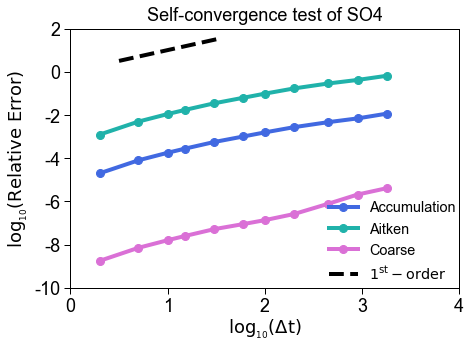

In [12]:
# make the plot of error convergence
ps.plot_convergence(outpath,out_name,var_type,x_array,rel_err,porder=[1],
                    ylabel=np.arange(-10,3,2),ylim=[-10,2],nrows=1,ncols=1,
                    loc=[0.65,0],fontheight=18,left=0,right=0.9,top=0.9,bottom=0)

In [13]:
for n in np.arange(mode):
    if  n == 0:
        print('Accumulation mode:')
    elif  n == 1:
        print('Aitken mode:')
    else:
        print('Coarse mode:')
    for i in np.arange(x_array.size):
        print('dt = %4i, relative error = %.4e' % (x_array[i], rel_err[i,n]))

Accumulation mode:
dt =    2, relative error = 1.9818e-05
dt =    5, relative error = 7.8944e-05
dt =   10, relative error = 1.7641e-04
dt =   15, relative error = 2.7256e-04
dt =   30, relative error = 5.5352e-04
dt =   60, relative error = 1.0001e-03
dt =  100, relative error = 1.5477e-03
dt =  200, relative error = 2.7066e-03
dt =  450, relative error = 4.6182e-03
dt =  900, relative error = 6.8815e-03
dt = 1800, relative error = 1.1428e-02
Aitken mode:
dt =    2, relative error = 1.2292e-03
dt =    5, relative error = 4.8962e-03
dt =   10, relative error = 1.0940e-02
dt =   15, relative error = 1.6901e-02
dt =   30, relative error = 3.4313e-02
dt =   60, relative error = 6.2121e-02
dt =  100, relative error = 9.6211e-02
dt =  200, relative error = 1.6824e-01
dt =  450, relative error = 2.8513e-01
dt =  900, relative error = 4.1539e-01
dt = 1800, relative error = 6.4769e-01
Coarse mode:
dt =    2, relative error = 1.7521e-09
dt =    5, relative error = 7.0141e-09
dt =   10, relative

In [14]:
# define basic array and examined variables
vname     = "soa_aer"
var_type  = "aer"
out_name  = "SOA"

In [15]:
# store the last time slice of variable from each file
for i in np.arange(tsize):
    fname = 'mam_dt'+str(dt[i])+'_ndt'+str(ndt[i])+'.nc'
    ds    = xr.open_dataset(data_path+fname)
    yy    = np.array(ds[vname])
    if  var_type == 'aer':
        if  i == 0:
            mode     = ds['mode'].size - 1     # soa or so4 does not exist in primary carbon mode
            y_array  = np.empty([mode,tsize])
        y_array[0:mode,i] = yy[0:mode,-1]
    elif var_type == 'gas':
        if  i == 0:
            y_array  = np.empty([tsize])
        y_array[i]   = yy[-1]
    else:
        print("Unrecognized var_type: %s" % var_type)
    ds.close()
    del fname

# calculate the relative error using 1s as reference solution
for i in np.arange(tsize):
    if  var_type == 'aer':
        if  i == 0:
            rel_err        = np.empty([tsize-1,mode])
        else:
            rel_err[i-1,:] = np.abs(y_array[:,i] - y_array[:,0]) / y_array[:,0]
    elif var_type == 'gas':
        if  i == 0:
            rel_err        = np.empty([tsize-1])
        else:
            rel_err[i-1]   = np.abs(y_array[i] - y_array[0]) / y_array[0]
    else:
        print("Unrecognized var_type: %s" % var_type)

del y_array

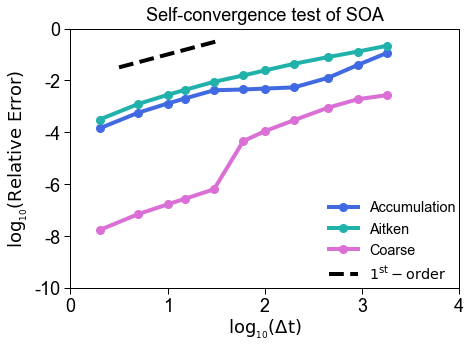

In [16]:
# make the plot of error convergence
ps.plot_convergence(outpath,out_name,var_type,x_array,rel_err,porder=[1],
                    ylabel=np.arange(-10,1,2),ylim=[-10,0],nrows=1,ncols=1,
                    loc=[0.65,0],fontheight=18,left=0,right=0.9,top=0.9,bottom=0)

In [17]:
for n in np.arange(mode):
    if  n == 0:
        print('Accumulation mode:')
    elif  n == 1:
        print('Aitken mode:')
    else:
        print('Coarse mode:')
    for i in np.arange(x_array.size):
        print('dt = %4i, relative error = %.4e' % (x_array[i], rel_err[i,n]))

Accumulation mode:
dt =    2, relative error = 1.4141e-04
dt =    5, relative error = 5.6622e-04
dt =   10, relative error = 1.2761e-03
dt =   15, relative error = 1.9882e-03
dt =   30, relative error = 4.1376e-03
dt =   60, relative error = 4.4367e-03
dt =  100, relative error = 4.8095e-03
dt =  200, relative error = 5.3456e-03
dt =  450, relative error = 1.2580e-02
dt =  900, relative error = 3.8758e-02
dt = 1800, relative error = 1.1386e-01
Aitken mode:
dt =    2, relative error = 3.0803e-04
dt =    5, relative error = 1.2295e-03
dt =   10, relative error = 2.7564e-03
dt =   15, relative error = 4.2725e-03
dt =   30, relative error = 8.7560e-03
dt =   60, relative error = 1.5456e-02
dt =  100, relative error = 2.4013e-02
dt =  200, relative error = 4.3424e-02
dt =  450, relative error = 7.9326e-02
dt =  900, relative error = 1.2827e-01
dt = 1800, relative error = 2.1534e-01
Coarse mode:
dt =    2, relative error = 1.6832e-08
dt =    5, relative error = 6.9452e-08
dt =   10, relative